# Dataset “1991_U.S._General_Social_Survey"

## Análise Exploratória

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy.stats import ttest_ind

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#Load Dataset “1991_U.S._General_Social_Survey" after removing columns
social_data = pd.read_excel("/content/drive/MyDrive/7.Quantitative and Statistical Analysis & Modeling/1991_U.S._General_Social_Survey_resumido.xls")

In [44]:
social_data.head()

,sex,happy,life,age
0,2,1,1,61
1,2,2,1,32
2,1,1,0,35
3,2,9,2,26
4,2,2,1,25


In [45]:
# Dataframe tem 1517 linhas (observações) e 4 colunas (features) - 'sex', 'happy', 'life' e 'age'.
social_data.shape

(1517, 4)

In [46]:
#lgumas analíticas básicas
social_data.describe()

,sex,happy,life,age
count,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.580751,1.860910,1.104812,45.731707
std,0.493599,0.904274,1.116066,17.948214
min,1.000000,1.000000,0.000000,18.000000
25%,1.000000,1.000000,0.000000,32.000000
50%,2.000000,2.000000,1.000000,41.000000
75%,2.000000,2.000000,2.000000,60.000000
max,2.000000,9.000000,9.000000,99.000000


---

### Análise exploratória - Feature 'sex'

In [47]:
#Sex feature é binária, assume valores de 1 (se for mulher) e 2 (se for homem).
sorted(social_data['sex'].unique())

[1, 2]

In [48]:
#Número de mulheres que responderam ao inquérito
social_data[social_data['sex'] == 1].shape[0]

636

In [49]:
#Número de homens que responderam ao inquérito
social_data[social_data['sex'] == 2].shape[0]

881

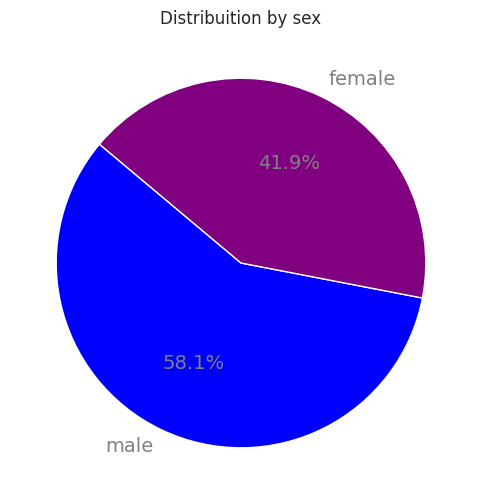

In [50]:
#Pie chart by 'sex'
sns.set_style('whitegrid')
plt.figure(figsize=(6, 6))
cores = ['blue', 'purple']
plt.pie(social_data['sex'].value_counts(), labels=['male', 'female'], autopct='%1.1f%%', startangle=140, colors=cores, textprops={'color': 'grey', 'fontsize': 14})
plt.title('Distribuition by sex')
plt.show()

Com o pie chart acima conseguimos visualizar claramente que este estudo recolheu dados de mais homens (58.1%) que mulheres (41.9%).

---

### Análise exploratória -  Feature 'age'

In [51]:
#Age feature - a idade dos indíviduos incluidos nas observações varia entre 18 e 99 anos.
sorted(social_data['age'].unique())

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 99]

Limites dos bins para Males: [18.  26.1 34.2 42.3 50.4 58.5 66.6 74.7 82.8 90.9 99. ]
Limites dos bins para Females: [18.  25.1 32.2 39.3 46.4 53.5 60.6 67.7 74.8 81.9 89. ]


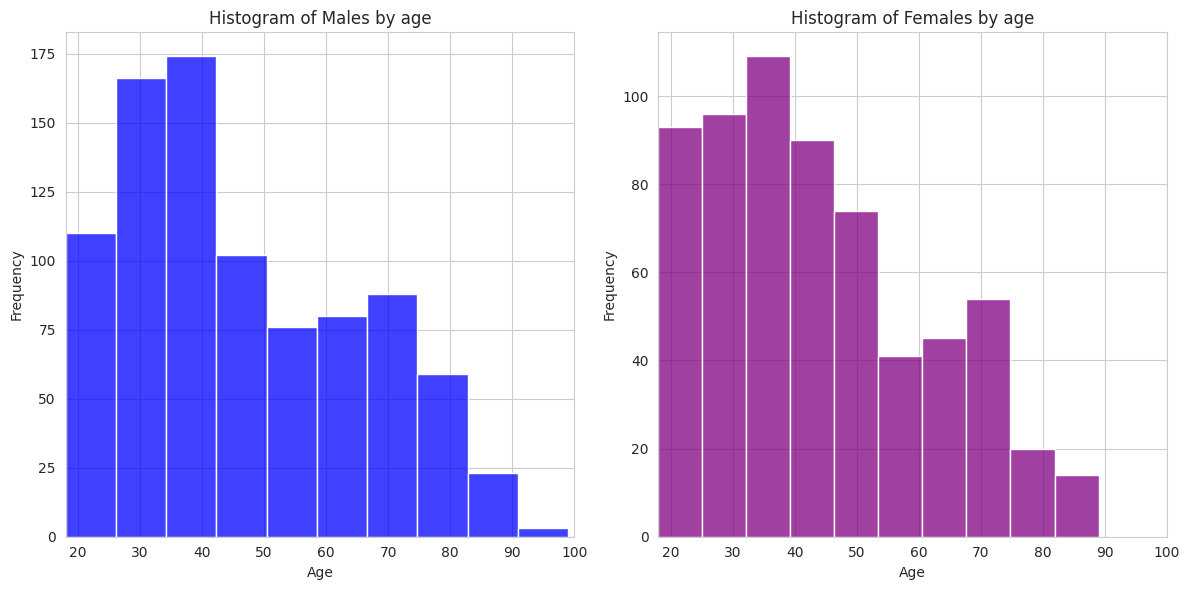

In [52]:
# Histograms by gender
num_bins = 10
male_data = social_data[social_data['sex'] == 2]['age']
female_data = social_data[social_data['sex'] == 1]['age']

# Calculando os limites dos bins
male_hist, male_bin_edges = np.histogram(male_data, bins=num_bins)
female_hist, female_bin_edges = np.histogram(female_data, bins=num_bins)
print("Limites dos bins para Males:", male_bin_edges)
print("Limites dos bins para Females:", female_bin_edges)

# Male
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(male_data, bins=male_bin_edges, kde=False, label='Male', color='blue', ax=axes[0])
axes[0].set_title('Histogram of Males by age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([18, 100])

# Female
sns.histplot(female_data, bins=female_bin_edges, kde=False, label='Female', color='purple', ax=axes[1])
axes[1].set_title('Histogram of Females by age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([18, 100])

plt.tight_layout()
plt.show()

Através da visualização destes histogramas concluimos que neste estudo:
* a distribuição das idades não é normal, tanto nos homens como nas mulheres;
* existem homens de todas as idades entre os 18 e os 99 anos;
* no caso das mulheres, as idades variam entre os 18 e os 89 anos;
* existe um pico de homens com idades entre 26 e os 42 anos;
* existe um pico do número de mulheres com idades compreendidas entre os 32 e os 39 anos.





---

### Análise exploratória - Feature 'happy' e 'life'

In [53]:
#Happy feature acreditamos que assume valores de 1, 2 e 3. No caso do 9 provavelmente trata-se de valores inválidos ou nulos.
sorted(social_data['happy'].unique())

[1, 2, 3, 9]

In [54]:
#Life feature acreditamos que assume valores de 0, 1, 2 e 3. No caso do 8 e 9 provavelmente trata-se de valores inválidos ou nulos.
sorted(social_data['life'].unique())

[0, 1, 2, 3, 8, 9]

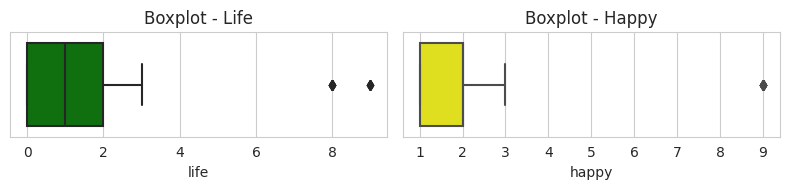

In [55]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
# Box plot for 'life' score
sns.boxplot(x='life', data=social_data, color='green', ax=axes[0])
axes[0].set_title('Boxplot - Life')
# Box plot for 'happy' score
sns.boxplot(x='happy', data=social_data, color='yellow', ax=axes[1])
axes[1].set_title('Boxplot - Happy')
plt.tight_layout()
plt.show()

Tendo em conta os boxplot das features 'life' e 'happy', podemos facilmente identifcar valores muito dispares do normal - outliers, que anteriormente já tinhamos identificado como valores inválidos.

Podemos ainda concluir que na feature ' life' 75% observações concentram-se entre valores 0, 1 e 2.

Na feature ' happy' 75% observações concentram-se entre valores 1 e 2.


### Remoção de Outliers de 'life' e 'happy'

Vamos remover as observações que contém valores inválidos de 8 e 9.

In [56]:
# Identify outliers for 'life'
lower_bound_life = 0
upper_bound_life = 3
outliers_life = np.where((social_data['life'] < lower_bound_life) | (social_data['life'] > upper_bound_life))
print("Outliers for 'life':")
print(outliers_life)

# Repeat the process for 'happy'
lower_bound_happy = 1
upper_bound_happy = 3
outliers_happy = np.where((social_data['happy'] < lower_bound_happy) | (social_data['happy'] > upper_bound_happy))
print("\nOutliers for 'happy':")
print(outliers_happy)

outliers_total = np.concatenate((outliers_happy[0], outliers_life[0]))
social_data_clean = social_data.drop(outliers_total)
social_data_clean

Outliers for 'life':
(array([  64,  113,  151,  210,  385,  390,  528,  699,  762,  931, 1104,
       1146, 1218]),)

Outliers for 'happy':
(array([   3,  113,  136,  254,  327,  474,  699,  759,  882,  888,  931,
       1104, 1492]),)


,sex,happy,life,age
0,2,1,1,61
1,2,2,1,32
2,1,1,0,35
4,2,2,1,25
5,1,2,0,59
...,...,...,...,...
1512,1,1,0,35
1513,1,2,1,82
1514,1,2,0,30
1515,1,2,2,70


In [57]:
#Após remoção dos outliers ficamos com um dataframe com as mesmas 4 features, mas apenas 1495 observações
social_data_clean.shape

(1495, 4)

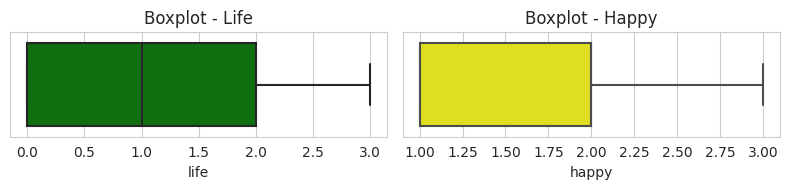

In [58]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
# Box plot for 'life' score
sns.boxplot(x='life', data=social_data_clean, color='green', ax=axes[0])
axes[0].set_title('Boxplot - Life')
# Box plot for 'happy' score
sns.boxplot(x='happy', data=social_data_clean, color='yellow', ax=axes[1])
axes[1].set_title('Boxplot - Happy')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


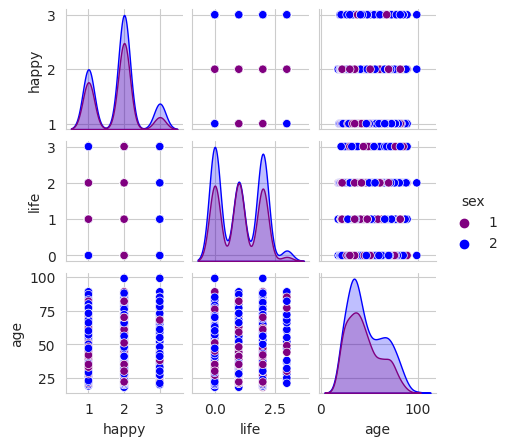

In [59]:
#Scatterplot matrix  by 'sex'
# Female = 1 (roxo)
#Male = 2 (azul)
cores_personalizadas = {2: 'blue', 1: 'purple'}
sns.set_style('whitegrid')
sns.pairplot(social_data_clean,hue='sex',palette=cores_personalizadas,size=1.5)
plt.show()

In [60]:
#Correlações entre variáveis
social_data_clean.corr()

,sex,happy,life,age
sex,1.000000,0.055029,0.012610,0.072724
happy,0.055029,1.000000,0.164835,-0.029467
life,0.012610,0.164835,1.000000,0.033422
age,0.072724,-0.029467,0.033422,1.000000


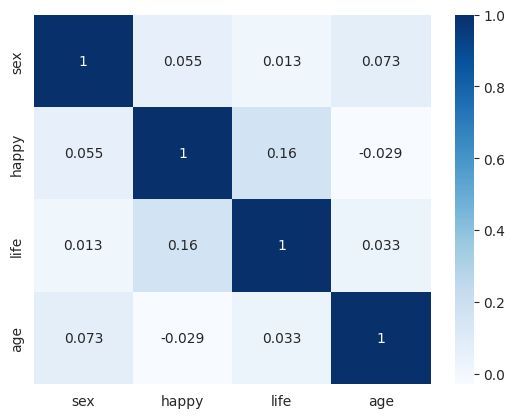

In [61]:
cores_azul_roxo = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(social_data_clean.corr(method='pearson'), annot = True, cmap=cores_azul_roxo);
plt.show()

---

## Teste de Hipóteses: Média Idade Homens > 45

1ª Etapa: Formular hipóteses

H0 (hipótese nula): média_homem <= 45


H1 (hipótese alternativa): média_homem > 45

Se rejeitarmos H0, significa que a média de idades dos homens é superior a 45.

In [62]:
# 1ª Etapa - Estabelecer o nível de significância de 5%
alpha = 0.05

 Este Teste de Hipóteses trata-se de um Teste Unilateral direita (rejeitamos a cauda inferior).

In [63]:
#Identificar e compilar os dados da nossa amostra que apenas inclui homens
homens = social_data_clean[social_data_clean['sex'] == 2]['age']

In [64]:
# 2ª Etapa - Identificar a estatística do teste
media_populacao = 45

media_amostra_homens = np.mean(homens)
media_amostra_homens

46.78085351787774

In [65]:
desvio_padrao_homens = np.std(homens)
desvio_padrao_homens

18.414375626703563

In [66]:
n = homens.shape[0]
n

867

In [67]:
z1 = (media_amostra_homens - media_populacao) / (desvio_padrao_homens /  math.sqrt(n))
z1

2.8476115735682517

In [68]:
# 3ª Etapa - Determinar o valor-p
#Obtivemos o valor de 0,9978 na Tabela de distribuições normais padrão
p_value_homens = 1 - 0.9978
p_value_homens

0.0021999999999999797

In [69]:
# 4ª Etapa - Comparar o valor-p com o nível de significância
if p_value_homens < alpha:
  print("Rejeitamos a Hipótese Nula.")
else:
  print("Não há evidências estatísticas para rejeitarmos a hipótese nula.")

Rejeitamos a Hipótese Nula.


O teste de hipóteses rejeitou a hipótese nula, o que quer dizer que há evidências estatísticas para a média de idades dos homens incluídos no social_data_clean ser maior que 45 anos.

---

## Teste de Hipóteses: Média Idade Mulheres <= 44

1ª Etapa: Formular hipóteses

H0: média_mulher > 44


H1: média_mulher <= 44

Se rejeitarmos H0, significa que a média de idades das mulheres é igual ou inferior a 44.

In [70]:
#1ª Etapa -Estabelecer o nível de significância de 5%
alpha = 0.05

 Este Teste de Hipóteses trata-se de um Teste Unilateral esquerda (rejeitamos a cauda superior).

In [71]:
# Identificar e compilar os dados da nossa amostra que apenas inclui mulheres
mulheres = social_data_clean[social_data_clean['sex'] == 1]['age']

In [72]:
# 3ª Etapa - Identificar a estatística do teste
media_populacao = 44

media_amostra_mulheres = np.mean(mulheres)
media_amostra_mulheres

44.14331210191083

In [73]:
desvio_padrao_mulheres = np.std(mulheres)
desvio_padrao_mulheres

17.04822225405369

In [74]:
z2 = (media_amostra_mulheres - media_populacao) / (desvio_padrao_mulheres /  math.sqrt(n))
z2

0.24752172094837674

In [75]:
# 3ª Etapa - Determinar o valor-p
#Obtivemos o valor de 0,5987 na Tabela de distribuições normais padrão
p_value_mulheres = 0.5987
p_value_mulheres

0.5987

In [76]:
if p_value_mulheres  < alpha:
  print("Rejeitamos a Hipótese Nula.")
else:
  print("Não há evidências estatísticas para rejeitarmos a hipótese nula.")

Não há evidências estatísticas para rejeitarmos a hipótese nula.


O teste de hipóteses não rejeitou a hipótese nula, o que quer dizer que o não há evidências estatísticas para a média ser maior que 45.

---

##  Extra: Tentamos ainda realizar em python o Teste de Hipóteses utilizando o Teste t unicaudal com a primeira hipótese relativamente aos homens

In [81]:
from scipy import stats

# Amostra
amostra = homens

# Valor da média a ser testado
media_hipotetica = 45

# Teste t de uma amostra
statistic, p_value = stats.ttest_1samp(amostra, media_hipotetica, alternative='greater')

# Imprimir o resultado
print("Estatística do teste z:", statistic)
print("Valor-p:", p_value)

# Tomar uma decisão com base no valor-p
alpha = 0.05
if p_value < alpha and statistic > 0:
    print("Rejeitar a hipótese nula - há evidências estatísticas para a média ser maior que 45.")
else:
    print("Não há evidências estatísticas para a média ser maior que 45. Não rejeitar a hipótese nula.")

Estatística do teste z: 2.845968878552076
Valor-p: 0.002266100002220311
Rejeitar a hipótese nula - há evidências estatísticas para a média ser maior que 45.
